<a href="https://colab.research.google.com/github/arpitadu/MNIST-Handwritten-Digit-Classification/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, callbacks
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.image import resize
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns


In [2]:
print("TensorFlow version:", tf.__version__)
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

TensorFlow version: 2.15.0
GPU is available


In [3]:
#Load dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Print record counts
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of test samples: {x_test.shape[0]}')


11490434/11490434 [==============================] - 2s 0us/step
Number of training samples: 60000
Number of test samples: 10000


In [ ]:
# Distribution of classes
unique_classes, class_counts = tf.unique(y_train)
print(f'Unique classes: {unique_classes.numpy()}')
print(f'Class counts: {class_counts.numpy()}')

Unique classes: [5 0 4 1 9 2 3 6 7 8]
Class counts: [0 1 2 ... 0 7 9]


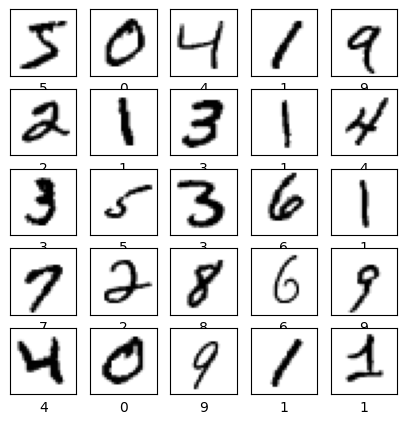

In [ ]:
# Display 5 by 5 (25) sample images
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary) #cmap='gray'
    plt.xlabel(y_train[i])
plt.show()

In [4]:
#Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape

(60000, 28, 28)

Image size is 28 x28

In [5]:
# expand new axis, channel axis  3 or 4 dimesion needed
x_train = np.expand_dims(x_train, axis=-1)


In [6]:
print(f"x_train_resized shape: {x_train.shape}")

x_train_resized shape: (60000, 28, 28, 1)


In [7]:
#repeat for test set
x_test = np.expand_dims(x_test, axis=-1)
print(f"x_test_resized shape: {x_test.shape}")

x_test_resized shape: (10000, 28, 28, 1)


In [ ]:
model = tf.keras.Sequential(

    [
        Input(shape=(28,28,1)),
        Conv2D(32, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        Conv2D(128, (3,3), activation='relu'),

        MaxPool2D(),
        BatchNormalization(),

        GlobalAvgPool2D(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

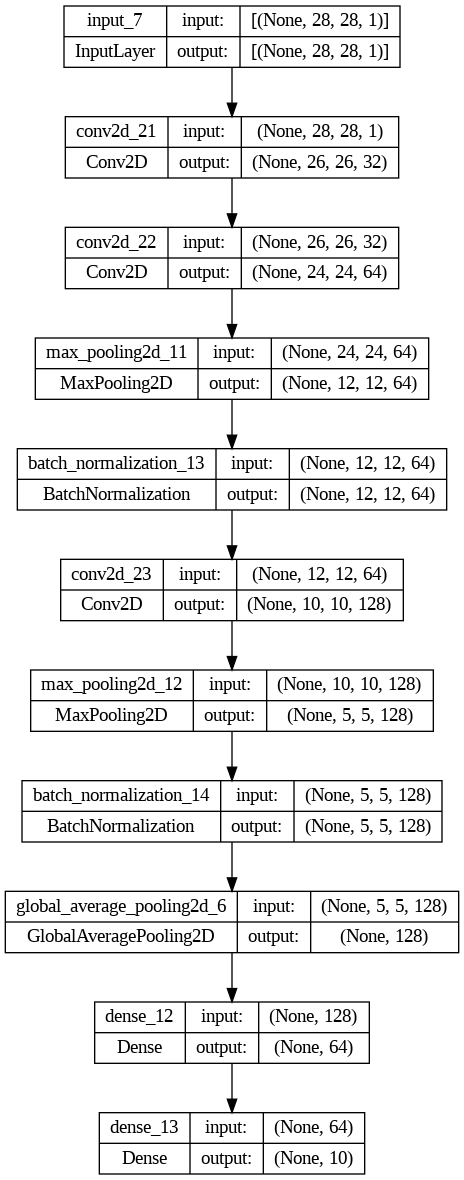

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# Define callbacks (optional)
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=3),
    callbacks.ModelCheckpoint(filepath='mnist_CNN.h5', monitor='val_accuracy', save_best_only=True)
]
trained_model=model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=callbacks_list)



Epoch 1/10
750/750 [==============================] - 14s 14ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0363 - val_accuracy: 0.9899
Epoch 2/10
 11/750 [..............................] - ETA: 7s - loss: 0.0164 - accuracy: 0.9957

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 10s 14ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0307 - val_accuracy: 0.9917
Epoch 3/10
750/750 [==============================] - 10s 14ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0312 - val_accuracy: 0.9913
Epoch 4/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0268 - val_accuracy: 0.9921
Epoch 5/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0278 - val_accuracy: 0.9922
Epoch 6/10
750/750 [==============================] - 10s 14ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0251 - val_accuracy: 0.9921
Epoch 7/10
750/750 [==============================] - 10s 13ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0385 - val_accuracy: 0.9900
Epoch 8/10
750/750 [==============================] - 10s 13ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0361 - val_accuracy: 0.9910
Epo

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')



313/313 [==============================] - 1s 4ms/step - loss: 0.0376 - accuracy: 0.9900
Test accuracy: 0.9900000095367432


313/313 [==============================] - 1s 3ms/step


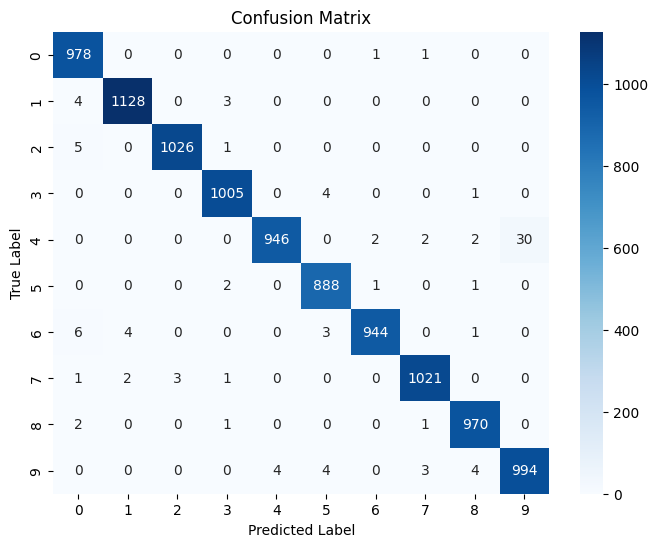

In [ ]:

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Digit 0: Precision = 0.98, Recall = 1.00, F1-Score = 0.99
Digit 1: Precision = 0.99, Recall = 0.99, F1-Score = 0.99
Digit 2: Precision = 1.00, Recall = 0.99, F1-Score = 1.00
Digit 3: Precision = 0.99, Recall = 1.00, F1-Score = 0.99
Digit 4: Precision = 1.00, Recall = 0.96, F1-Score = 0.98
Digit 5: Precision = 0.99, Recall = 1.00, F1-Score = 0.99
Digit 6: Precision = 1.00, Recall = 0.99, F1-Score = 0.99
Digit 7: Precision = 0.99, Recall = 0.99, F1-Score = 0.99
Digit 8: Precision = 0.99, Recall = 1.00, F1-Score = 0.99
Digit 9: Precision = 0.97, Recall = 0.99, F1-Score = 0.98


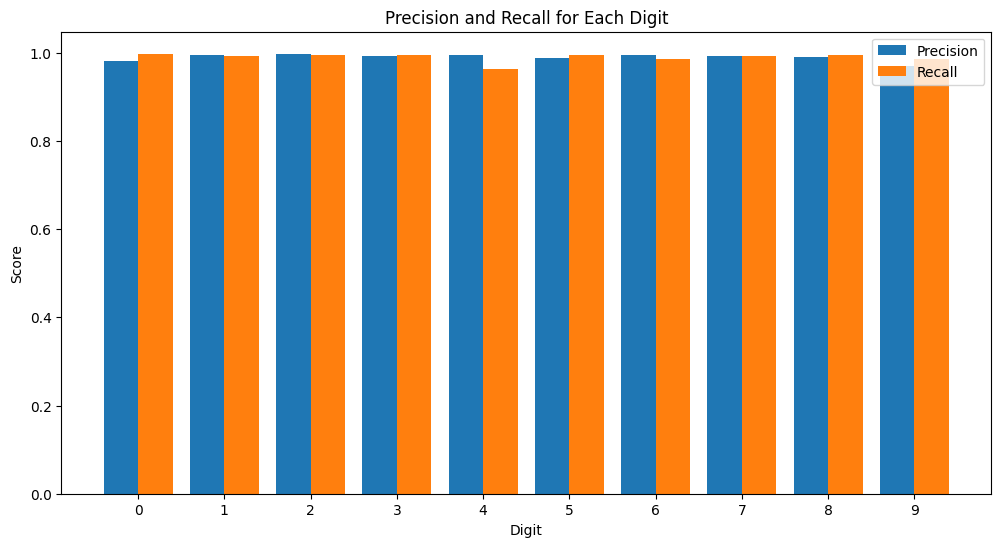

In [ ]:
# Calculate precision and recall
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None, labels=np.arange(10))

# Print precision and recall for each class
for i in range(10):
    print(f"Digit {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F1-Score = {f1_score[i]:.2f}")

# Optionally, you can plot the precision and recall
plt.figure(figsize=(12, 6))
plt.bar(np.arange(10) - 0.2, precision, width=0.4, label='Precision')
plt.bar(np.arange(10) + 0.2, recall, width=0.4, label='Recall')
plt.xlabel('Digit')
plt.ylabel('Score')
plt.title('Precision and Recall for Each Digit')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

 **Adding extra layers to make denser model**

In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    BatchNormalization(),

    GlobalAvgPool2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


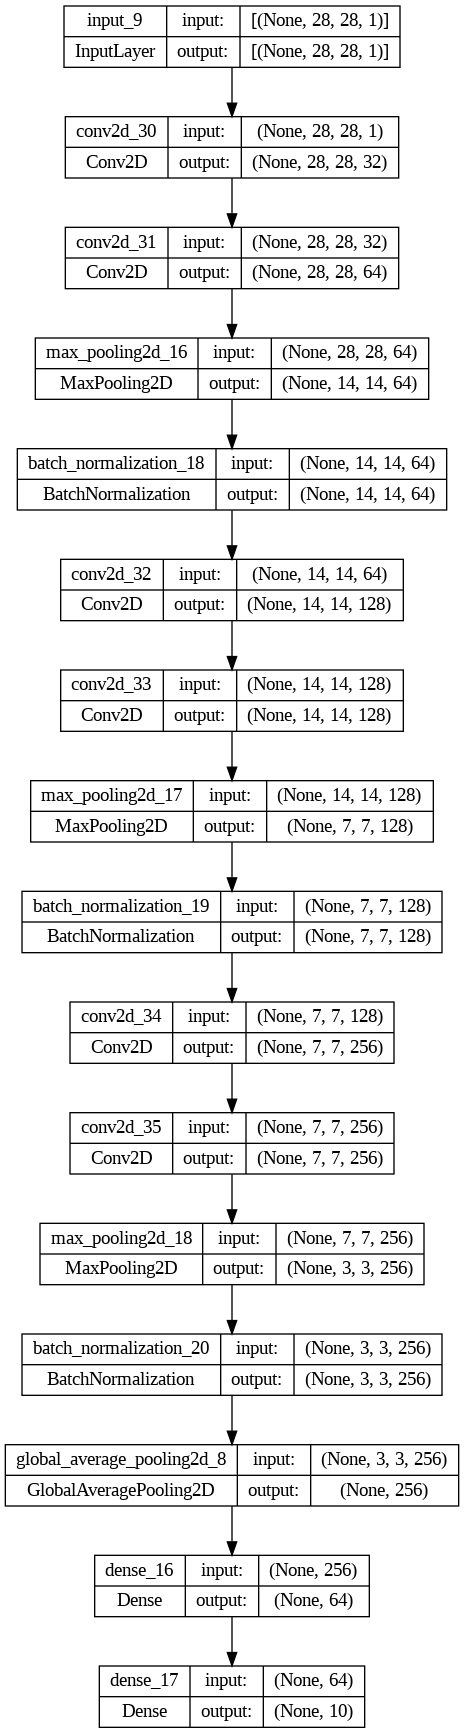

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

trained_model=model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2,callbacks=callbacks_list)

model.evaluate(x_test, y_test, batch_size=64)

Epoch 1/10
750/750 [==============================] - 13s 13ms/step - loss: 0.0949 - accuracy: 0.9723 - val_loss: 0.0551 - val_accuracy: 0.9839
Epoch 2/10
750/750 [==============================] - 10s 13ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0373 - val_accuracy: 0.9887
Epoch 3/10
750/750 [==============================] - 10s 14ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0371 - val_accuracy: 0.9887
Epoch 4/10
750/750 [==============================] - 10s 13ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0287 - val_accuracy: 0.9906
Epoch 5/10
750/750 [==============================] - 10s 13ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0318 - val_accuracy: 0.9904
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0376 - accuracy: 0.9893


[0.03763631731271744, 0.989300012588501]

313/313 [==============================] - 1s 4ms/step - loss: 0.0376 - accuracy: 0.9893
Test accuracy: 0.989300012588501


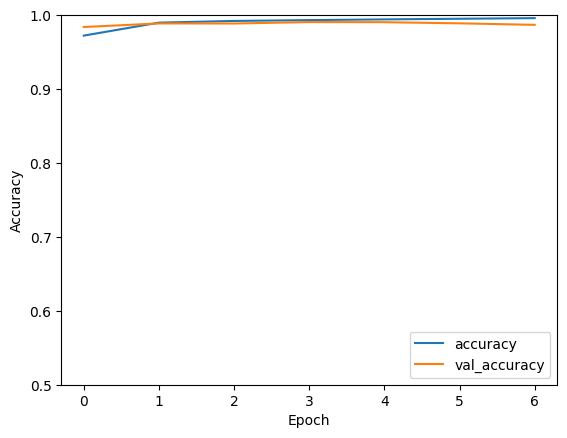

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training model
import matplotlib.pyplot as plt

plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.plot(trained_model.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step


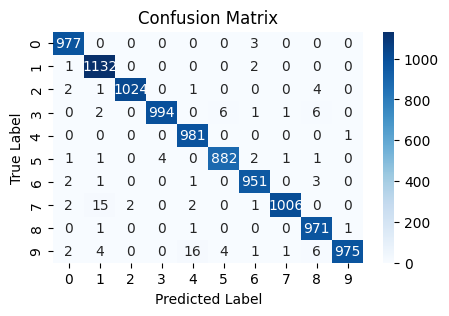

In [ ]:


# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Digit 0: Precision = 0.99, Recall = 1.00, F1-Score = 0.99
Digit 1: Precision = 0.98, Recall = 1.00, F1-Score = 0.99
Digit 2: Precision = 1.00, Recall = 0.99, F1-Score = 1.00
Digit 3: Precision = 1.00, Recall = 0.98, F1-Score = 0.99
Digit 4: Precision = 0.98, Recall = 1.00, F1-Score = 0.99
Digit 5: Precision = 0.99, Recall = 0.99, F1-Score = 0.99
Digit 6: Precision = 0.99, Recall = 0.99, F1-Score = 0.99
Digit 7: Precision = 1.00, Recall = 0.98, F1-Score = 0.99
Digit 8: Precision = 0.98, Recall = 1.00, F1-Score = 0.99
Digit 9: Precision = 1.00, Recall = 0.97, F1-Score = 0.98


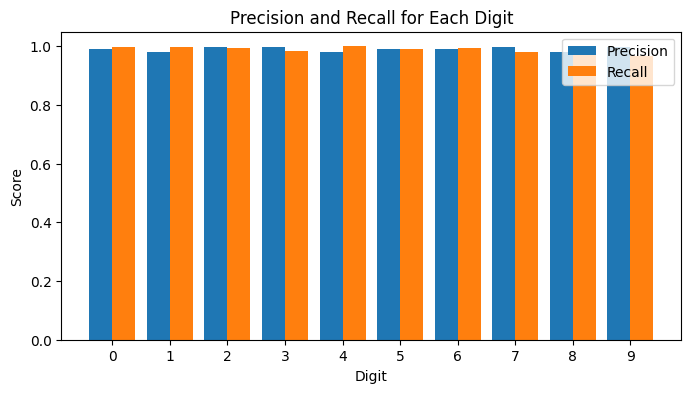

In [ ]:
# Calculate precision and recall
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None, labels=np.arange(10))

# Print precision and recall for each class
for i in range(10):
    print(f"Digit {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F1-Score = {f1_score[i]:.2f}")

# Optionally, you can plot the precision and recall
plt.figure(figsize=(8,4))
plt.bar(np.arange(10) - 0.2, precision, width=0.4, label='Precision')
plt.bar(np.arange(10) + 0.2, recall, width=0.4, label='Recall')
plt.xlabel('Digit')
plt.ylabel('Score')
plt.title('Precision and Recall for Each Digit')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

**Transfer Learning - VGG19**

In [8]:
# Convert to RGB format by repeating the grayscale channel
x_train_resized = tf.repeat(x_train, 3, axis=-1)
x_test_resized = tf.repeat(x_test, 3, axis=-1)

In [10]:
# Example tensor shape
input_shape = tf.TensorShape([10000, 28, 28, 3])

# Desired output shape
target_shape = tf.TensorShape([10000, 48, 48, 3])



# Resize tensor to target shape
x_train_resized = tf.image.resize(x_train_resized , target_shape[1:3])

# Check the shape of resized tensor
print(x_train_resized.shape)

# Resize tensor to target shape
x_test_resized = tf.image.resize(x_test_resized , target_shape[1:3])

# Check the shape of resized tensor
print(x_test_resized.shape)

(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [16]:
x_test_resized.shape

TensorShape([10000, 48, 48, 3])

In [11]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import Input

# Load pre-trained VGG19 model without the top (classification) layers
input_layer=layers.Input(shape=(48,48,3))
base_model = VGG19(weights='imagenet', include_top=False, input_tensor= input_layer)
base_model.trainable = False  # Freeze the base model



80134624/80134624 [==============================] - 4s 0us/step


In [12]:
# Add custom classification layers on top
x = layers.Flatten()(base_model.output)
x =layers. Dense(512, activation='relu')(x)
outputs =layers. Dense(10, activation='softmax')(x)

# Create the transfer learning model
model =models.Model(inputs=base_model.input, outputs=outputs)

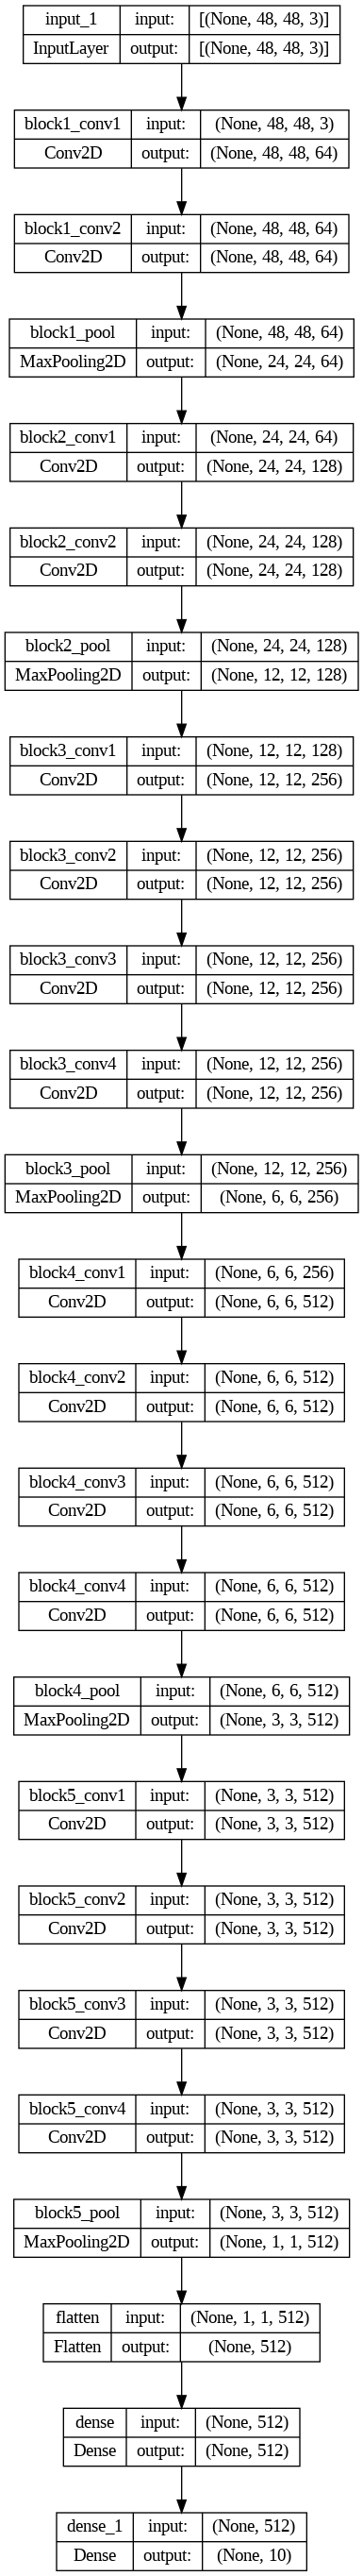

In [13]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks (optional)
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint(filepath='vgg19_mnist.h5', monitor='val_sparse_categorical_accuracy', save_best_only=True)
]

# Train the model
trained_model=model.fit(x_train_resized, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=callbacks_list)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
750/750 [==============================] - ETA: 0s - loss: 0.0952 - accuracy: 0.9700

750/750 [==============================] - 22s 28ms/step - loss: 0.0952 - accuracy: 0.9700 - val_loss: 0.0806 - val_accuracy: 0.9728
Epoch 2/10
748/750 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9741

750/750 [==============================] - 22s 29ms/step - loss: 0.0808 - accuracy: 0.9741 - val_loss: 0.1075 - val_accuracy: 0.9651
Epoch 3/10
750/750 [==============================] - ETA: 0s - loss: 0.0745 - accuracy: 0.9760

750/750 [==============================] - 21s 27ms/step - loss: 0.0745 - accuracy: 0.9760 - val_loss: 0.0698 - val_accuracy: 0.9771
Epoch 4/10
750/750 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9779

750/750 [==============================] - 22s 30ms/step - loss: 0.0677 - accuracy: 0.9779 - val_loss: 0.0712 - val_accuracy: 0.9785
Epoch 5/10
748/750 [============================>.] - ETA: 0s - loss: 0.0638 - accuracy: 0.9795

750/750 [==============================] - 22s 29ms/step - loss: 0.0638 - accuracy: 0.9795 - val_loss: 0.0757 - val_accuracy: 0.9746
Epoch 6/10
749/750 [============================>.] - ETA: 0s - loss: 0.0585 - accuracy: 0.9810

313/313 [==============================] - 5s 17ms/step - loss: 0.0740 - accuracy: 0.9765
Test accuracy: 0.9764999747276306


313/313 [==============================] - 6s 16ms/step


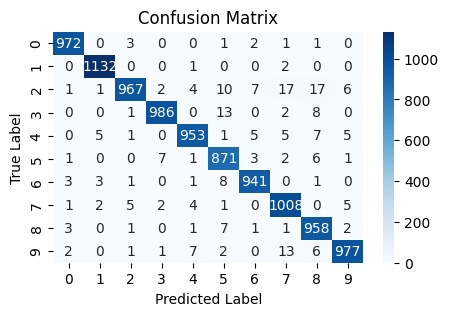

In [19]:
# Generate predictions
y_pred = model.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Digit 0: Precision = 0.99, Recall = 0.99, F1-Score = 0.99
Digit 1: Precision = 0.99, Recall = 1.00, F1-Score = 0.99
Digit 2: Precision = 0.99, Recall = 0.94, F1-Score = 0.96
Digit 3: Precision = 0.99, Recall = 0.98, F1-Score = 0.98
Digit 4: Precision = 0.98, Recall = 0.97, F1-Score = 0.98
Digit 5: Precision = 0.95, Recall = 0.98, F1-Score = 0.96
Digit 6: Precision = 0.98, Recall = 0.98, F1-Score = 0.98
Digit 7: Precision = 0.96, Recall = 0.98, F1-Score = 0.97
Digit 8: Precision = 0.95, Recall = 0.98, F1-Score = 0.97
Digit 9: Precision = 0.98, Recall = 0.97, F1-Score = 0.97


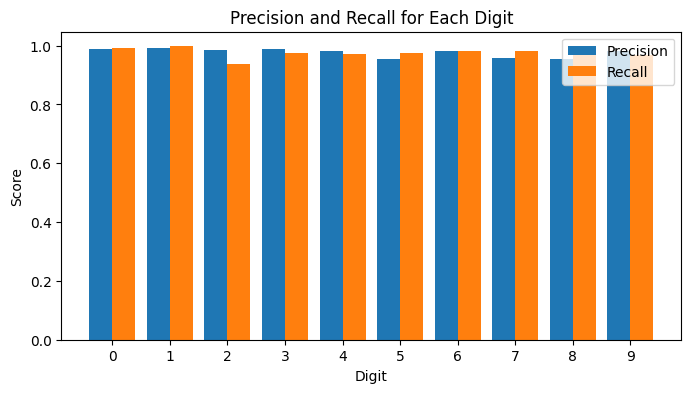

In [20]:
# Calculate precision and recall
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None, labels=np.arange(10))

# Print precision and recall for each class
for i in range(10):
    print(f"Digit {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F1-Score = {f1_score[i]:.2f}")

# Optionally, you can plot the precision and recall
plt.figure(figsize=(8,4))
plt.bar(np.arange(10) - 0.2, precision, width=0.4, label='Precision')
plt.bar(np.arange(10) + 0.2, recall, width=0.4, label='Recall')
plt.xlabel('Digit')
plt.ylabel('Score')
plt.title('Precision and Recall for Each Digit')
plt.xticks(np.arange(10))
plt.legend()
plt.show()